# 1. 모듈 Import 및 초기 설정

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from scipy import stats
import pandas as pd
import numpy as np

font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 2. 데이터프레임으로 출력

In [190]:
wine = pd.read_csv('wine_sqlTOcsv.csv', encoding='UTF-8')
wine['wine_vintage'] =  wine['wine_vintage'].values.astype(np.int64)
wine['cost'] =  wine['cost'].values.astype(np.int64)

wine.head()

,Continent,wine_name,wine_vintage,wine_rate,rating_num,country,region,farm,category,variety,cost,tasty_note,tasty_num
0,South America,Primus Malbec (Primum),2003,4.3,161,Argentina,Tunuy?n,Salentein,Redwine,Malbec,30,oaky,325.0
1,Oceania,Encore Noble Riesling,2016,4.3,147,New Zealand,Canterbury,PegasusBay,Whitewine,Riesling,33,earthy,47.0
2,Oceania,Sauvignon Blanc,2021,4.2,4882,New Zealand,Marlborough,CloudyBay,Whitewine,Sauvignon Blanc,34,citrus,7364.0
3,Oceania,Wild Sauvignon,2014,4.2,899,New Zealand,Marlborough,Greywacke,Whitewine,Sauvignon Blanc,38,citrus,832.0
4,Oceania,Wild Sauvignon,2019,4.2,294,New Zealand,Marlborough,Greywacke,Whitewine,Sauvignon Blanc,32,citrus,832.0


# 3. 컬럼에 따른 빈도 분포와 평점 분포

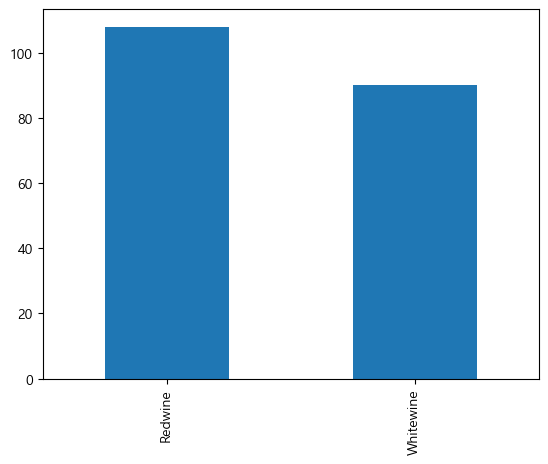

In [191]:
# 카테고리 별 빈도 분포
wine["category"].value_counts().plot.bar()
plt.show()

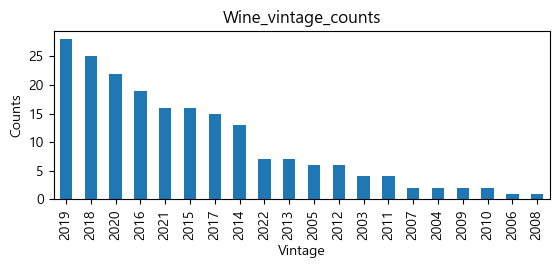

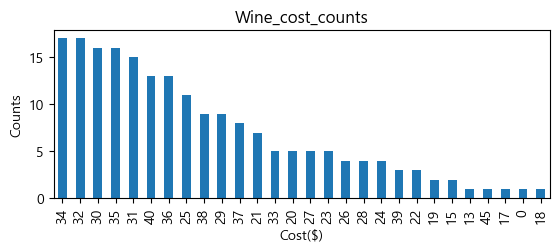

In [192]:
# 와인 vintage별 빈도 분포
plt.subplot(2,1,1)
wine["wine_vintage"].value_counts().plot.bar()
plt.title('Wine_vintage_counts')
plt.xlabel('Vintage')
plt.ylabel('Counts')
plt.show()

# 와인 cost별 빈도 분포
plt.subplot(2,1,2)
wine["cost"].value_counts().plot.bar()
plt.title('Wine_cost_counts')
plt.xlabel('Cost($)')
plt.ylabel('Counts')
plt.show()




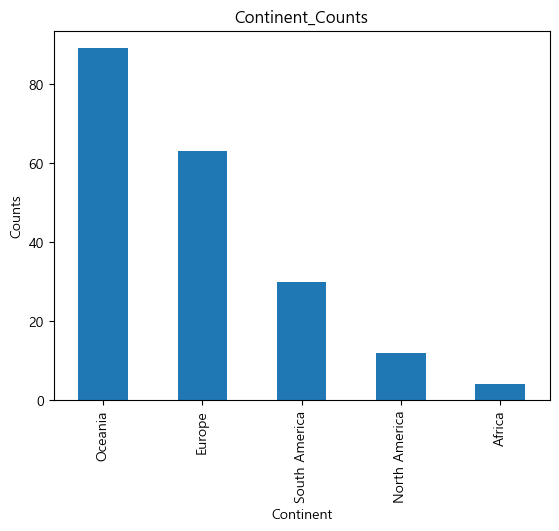

In [193]:
# 대륙 별 빈도수
wine["Continent"].value_counts().plot.bar()
plt.title('Continent_Counts')
plt.xlabel('Continent')
plt.ylabel('Counts')
plt.show()

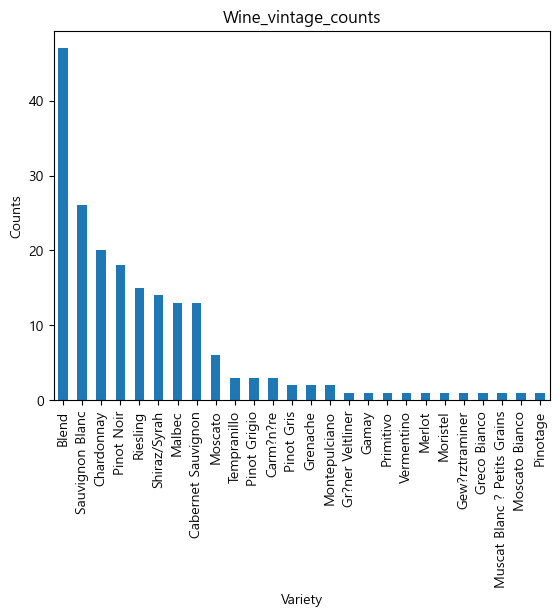

In [194]:
# 와인 종류 별 빈도 분포
wine["variety"].value_counts().plot.bar()
plt.title('Wine_vintage_counts')
plt.xlabel('Variety')
plt.ylabel('Counts')
plt.show()


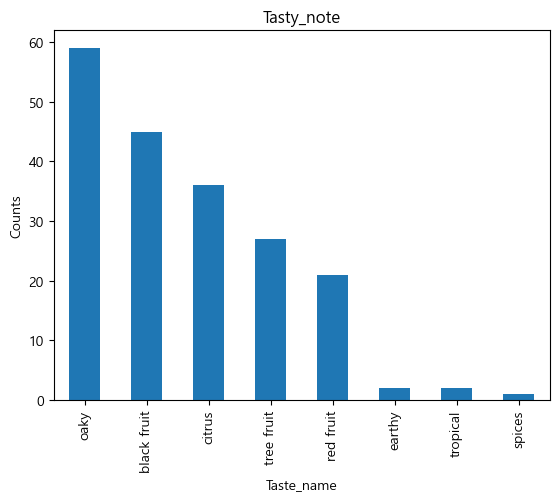

In [195]:
# 와인 테이스티 별 빈도 분포
wine["tasty_note"].value_counts().plot.bar()
plt.title('Tasty_note')
plt.xlabel('Taste_name')
plt.ylabel('Counts')
plt.show()

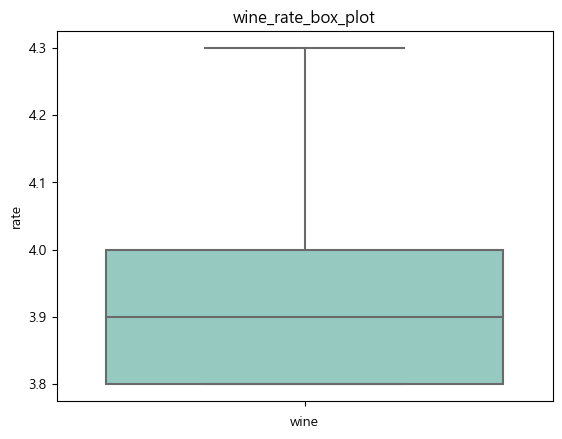

In [196]:
# 평점 분포
sns.boxplot(y = 'wine_rate',
            palette='Set3',
            data=wine)
plt.title('wine_rate_box_plot')
plt.xlabel('wine')
plt.ylabel('rate')
plt.show()

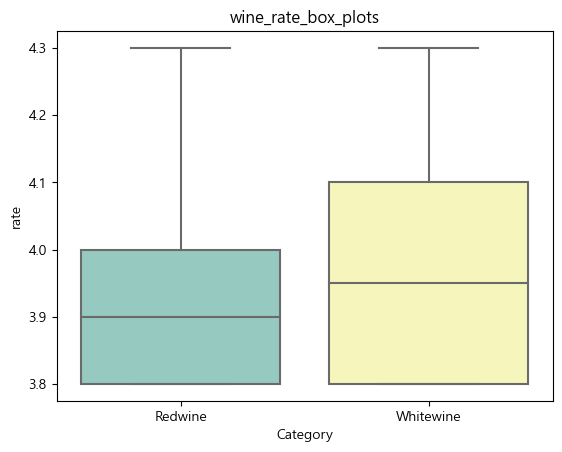

In [197]:
sns.boxplot(x = 'category',
            y = 'wine_rate',
            palette='Set3',
            data=wine)
plt.title('wine_rate_box_plots')
plt.xlabel('Category')
plt.ylabel('rate')
plt.show()

# 4. 레드와인과 화이트와인, 종류에 따른 통계

In [198]:
red_wine = wine.query('category == "Redwine"')
white_wine = wine.query('category == "Whitewine"')

In [199]:
# 레드와인 기숦통계
red_wine.describe()

,wine_vintage,wine_rate,rating_num,cost,tasty_num
count,108.000000,108.000000,108.000000,108.000000,107.000000
mean,2014.962963,3.912037,1318.046296,31.509259,472.121495
std,5.000796,0.134455,6525.157584,6.334146,640.370348
min,2003.000000,3.800000,25.000000,0.000000,3.000000
25%,2013.000000,3.800000,45.500000,30.000000,56.500000
50%,2016.000000,3.900000,126.000000,32.000000,181.000000
75%,2019.000000,4.000000,554.500000,35.000000,553.500000
max,2021.000000,4.300000,66909.000000,40.000000,3503.000000


In [200]:
# 화이트와인 기술통계
white_wine.describe()

,wine_vintage,wine_rate,rating_num,cost,tasty_num
count,90.000000,90.000000,90.000000,90.000000,86.000000
mean,2017.777778,3.960000,539.422222,30.044444,490.755814
std,3.012251,0.138044,2196.576632,6.461487,1150.110398
min,2007.000000,3.800000,25.000000,13.000000,2.000000
25%,2016.000000,3.800000,48.000000,25.000000,71.250000
50%,2018.000000,3.950000,109.000000,30.000000,165.000000
75%,2020.000000,4.100000,290.750000,35.000000,492.000000
max,2022.000000,4.300000,19672.000000,45.000000,7364.000000


In [203]:
# 레드와인과 화이트와인의 평점에 대한 T-Test
red_wine_quality = red_wine['wine_rate']
white_wine_quality = white_wine['wine_rate']

stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var = False)

# 95% 유의수준에서 레드와인과 화이트와인의 rate의 모평균은 차이는 존재한다.

Ttest_indResult(statistic=-2.4632866290704523, pvalue=0.01466769784014561)

In [204]:
wine2 = wine.copy()
wine2 = wine2.replace({'category' : 'Redwine'}, 1)
wine2 = wine2.replace({'category' : 'Whitewine'}, 0)

wine2.head()

,Continent,wine_name,wine_vintage,wine_rate,rating_num,country,region,farm,category,variety,cost,tasty_note,tasty_num
0,South America,Primus Malbec (Primum),2003,4.3,161,Argentina,Tunuy?n,Salentein,1,Malbec,30,oaky,325.0
1,Oceania,Encore Noble Riesling,2016,4.3,147,New Zealand,Canterbury,PegasusBay,0,Riesling,33,earthy,47.0
2,Oceania,Sauvignon Blanc,2021,4.2,4882,New Zealand,Marlborough,CloudyBay,0,Sauvignon Blanc,34,citrus,7364.0
3,Oceania,Wild Sauvignon,2014,4.2,899,New Zealand,Marlborough,Greywacke,0,Sauvignon Blanc,38,citrus,832.0
4,Oceania,Wild Sauvignon,2019,4.2,294,New Zealand,Marlborough,Greywacke,0,Sauvignon Blanc,32,citrus,832.0


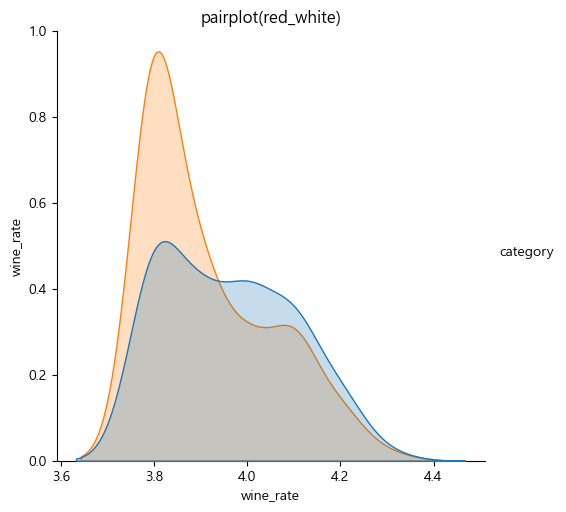

In [205]:
sns.pairplot(wine2, hue = 'category', vars = ['wine_rate'], height = 5)
plt.title('pairplot(red_white)')
#plt.xlabel('Vintage')
#plt.ylabel('Density')
plt.show()

# 오랜지색 -> 레드와인
# 파란색 -> 화이트와인

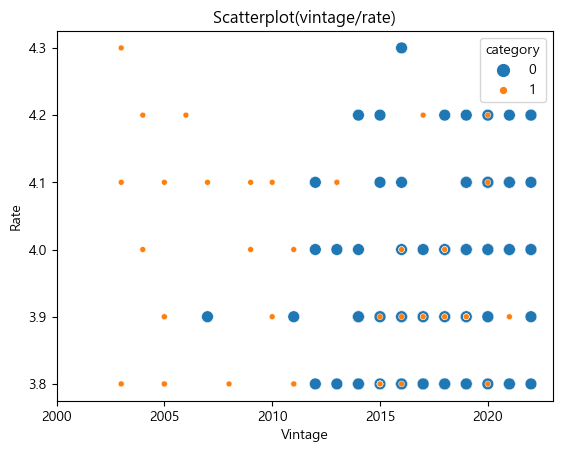

In [206]:
plt.xlim(2000, 2023)
sns.scatterplot(data = wine2,
                hue = 'category',
                x = 'wine_vintage',
                y = 'wine_rate',
                size = 'category')
plt.title('Scatterplot(vintage/rate)')
plt.xlabel('Vintage')
plt.ylabel('Rate')
plt.show()

# 5. 레드와인과 화이트와인의 Tasty Note에 대한 Word Cloud

In [207]:
import pandas as pd
from wordcloud import WordCloud
import collections
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

df = pd.read_csv('wine_WC.csv', encoding='UTF-8')
df.head()

,Continent,wine_name,wine_vintage,wine_rate,rating_num,country,region,farm,category,variety,cost,tasty_note,tasty_num
0,South America,Primus Malbec (Primum),2003,4.3,161,Argentina,Tunuy?n,Salentein,Redwine,Malbec,30,oaky,325
1,South America,Primus Malbec (Primum),2003,4.3,161,Argentina,Tunuy?n,Salentein,Redwine,Malbec,30,black fruit,261
2,South America,Primus Malbec (Primum),2003,4.3,161,Argentina,Tunuy?n,Salentein,Redwine,Malbec,30,spices,90
3,Oceania,Encore Noble Riesling,2016,4.3,147,New Zealand,Canterbury,PegasusBay,Whitewine,Riesling,33,earthy,47
4,Oceania,Encore Noble Riesling,2016,4.3,147,New Zealand,Canterbury,PegasusBay,Whitewine,Riesling,33,tree fruit,34


In [208]:
all_wine = df.copy()
red_wine = df.query('category == "Redwine"')
white_wine = df.query('category == "Whitewine"')

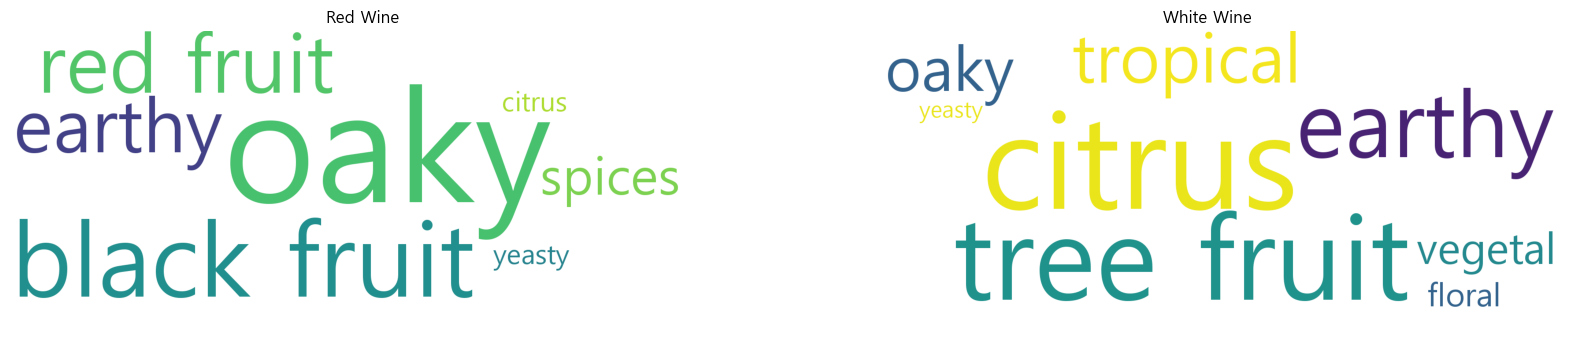

In [209]:
# 화이트와인과 레드와인의 테이스티노트 빈도를 표현한 워드클라우드

red_list = []
for i in red_wine['tasty_note']:
    red_list.append(i)
frequency_red = collections.Counter(red_list)


white_list = []
for i in white_wine['tasty_note']:
    white_list.append(i)
frequency_white = collections.Counter(white_list)


# 두개의 plot 만들기
plt.figure(figsize = (20, 10))

# 레드와인
plt.subplot(1,2,1)
Mwc = WordCloud(width=1600,
               height=700,
               background_color="white",
               random_state=0,
               font_path=r'c:\Windows\Fonts\malgun.ttf')
plt.imshow(wc.generate_from_frequencies(frequency_red))
plt.title('Red Wine')
plt.axis("off")



# 화이트와인
plt.subplot(1,2,2)
wc = WordCloud(width=1600,
               height=700,
               background_color="white",
               random_state=0,
               font_path=r'c:\Windows\Fonts\malgun.ttf')
plt.imshow(wc.generate_from_frequencies(frequency_white))
plt.title('White Wine')
plt.axis("off")
plt.show()